# Air Quality Index in Delhi, India

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('delhi_aqi.csv')

### EDA

#Exploratory Data Analysis

Feature extraction:
>Date - date feature is converted into datetime format.
        Also extracting the day, weekday, month, year and time.

>AQI - The AQI value for a given pollutant is calculated using a formula that takes into account the concentration of the pollutant, the Chigh and Clow, and the Ihigh and Ilow values set by the national standards.
>>Air quality subindex (SI) is calculated for each feature based on the below formula.

       SI  = ((C - Clow)/(Chigh - Clow)) * (Ihigh - Ilow) + (Ilow)
       

       C - Current pollutant value
       Chigh - Maximum allowed concentration of pollutant under National standards
       Ihigh - Peak AQI when the pollutant is at the allowed highest

>>AQI is calculated for every row, i.e., for every hour in the day based on the SI values of each pollutant.

>Health - Description label of AQI

### AQI Calculation

In [3]:
cols = df.columns

standard = {}
#[Chigh, Clow, Ihigh, Ilow]
standard['co'] = [100, 0, 50, 0]
standard['no'] = [400, 0, 200, 0]
standard['no2'] = [400, 0, 200, 0]
standard['o3'] = [180, 0, 100, 0]
standard['so2'] = [120, 0, 80, 0]
standard['pm2_5'] = [500, 0, 500, 0]
standard['pm10'] = [500, 0, 500, 0]
standard['nh3'] = [100, 0, 400, 0]

for index, row in df.iterrows() :

  for x in range(1, 9) :
    col = cols[x]
    si = []
    c = col
    C = row[x]
    chigh = standard[c][0]
    clow = standard[c][1]
    ihigh = standard[c][2]
    ilow = standard[c][3]

    temp = ((C - clow) / (chigh - clow)) * ((ihigh - ilow)) + (ilow)
    si.append(temp)

  aqi = max(si)
  df.at[index, 'aqi'] = aqi

In [4]:
print(df.columns)


Index(['date', 'co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi'], dtype='object')


In [5]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44


In [6]:
### Categorization of AQI
for index, row in df.iterrows() :
  if row['aqi'] <= 50 :
    df.at[index,'Health'] = 'Good'
  elif row['aqi'] <= 100 :
    df.at[index,'Health'] = 'Moderate'
  elif row['aqi'] <= 150 :
    df.at[index,'Health'] = 'Slightly Unhealthy'
  elif row['aqi'] <= 200 :
    df.at[index,'Health'] = 'Unhealthy'
  elif row['aqi'] <= 300 :
    df.at[index,'Health'] = 'Very unhealthy'
  else :
    df.at[index,'Health'] = 'Hazardous'

In [7]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy


In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.set_index('date', inplace=True)

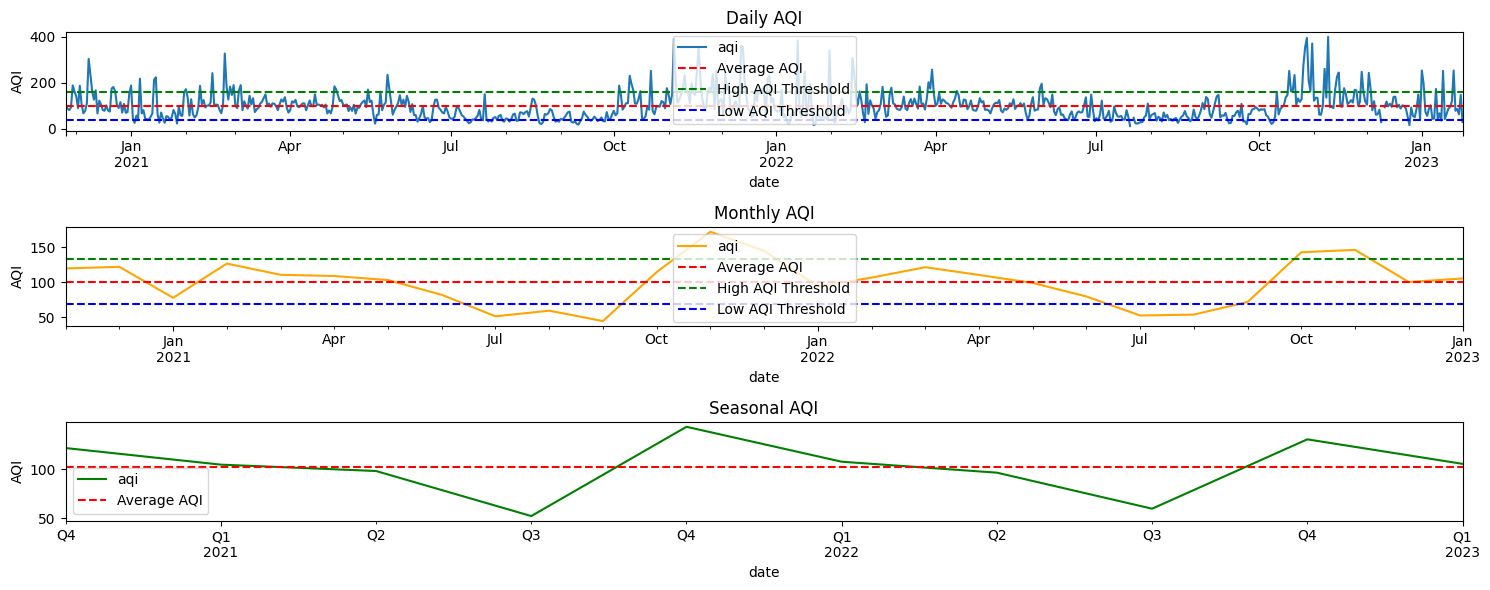

In [10]:

#df['date'] = pd.to_datetime(df['date'])

# Set the 'date' column as the index of the DataFrame
#df.set_index('date', inplace=True)


# Resampling the data to get daily, monthly, and seasonal averages
daily_aqi = df['aqi'].resample('D').mean()
monthly_aqi = df['aqi'].resample('M').mean()
seasonal_aqi = df['aqi'].resample('Q').mean()


# Calculate the mean and standard deviation for highlighting
mean_daily_aqi = daily_aqi.mean()
std_daily_aqi = daily_aqi.std()
mean_monthly_aqi = monthly_aqi.mean()
std_monthly_aqi = monthly_aqi.std()

# Plotting
plt.figure(figsize=(15, 6))

# Daily AQI
plt.subplot(3, 1, 1)
daily_aqi.plot(ax=plt.gca(), title='Daily AQI')
plt.ylabel('AQI')
plt.axhline(y=mean_daily_aqi, color='r', linestyle='--', label='Average AQI')
plt.axhline(y=mean_daily_aqi + std_daily_aqi, color='g', linestyle='--', label='High AQI Threshold')
plt.axhline(y=mean_daily_aqi - std_daily_aqi, color='b', linestyle='--', label='Low AQI Threshold')
plt.legend()

# Monthly AQI
plt.subplot(3, 1, 2)
monthly_aqi.plot(ax=plt.gca(), color='orange', title='Monthly AQI')
plt.ylabel('AQI')
plt.axhline(y=mean_monthly_aqi, color='r', linestyle='--', label='Average AQI')
plt.axhline(y=mean_monthly_aqi + std_monthly_aqi, color='g', linestyle='--', label='High AQI Threshold')
plt.axhline(y=mean_monthly_aqi - std_monthly_aqi, color='b', linestyle='--', label='Low AQI Threshold')
plt.legend()

# Seasonal AQI
plt.subplot(3, 1, 3)
seasonal_aqi.plot(ax=plt.gca(), color='green', title='Seasonal AQI')
plt.ylabel('AQI')
plt.axhline(y=seasonal_aqi.mean(), color='r', linestyle='--', label='Average AQI')
plt.legend()

plt.tight_layout()
plt.show()


>Across all plots, there is a red dashed line representing the average AQI, which provides a baseline to compare against individual data points or periods.
>The high and low AQI thresholds (average ± standard deviation) help in identifying periods with unusually high or low pollution levels. In particular, the periods where the AQI consistently exceeds the high threshold are of significant concern and may warrant health advisories or intervention by authorities.

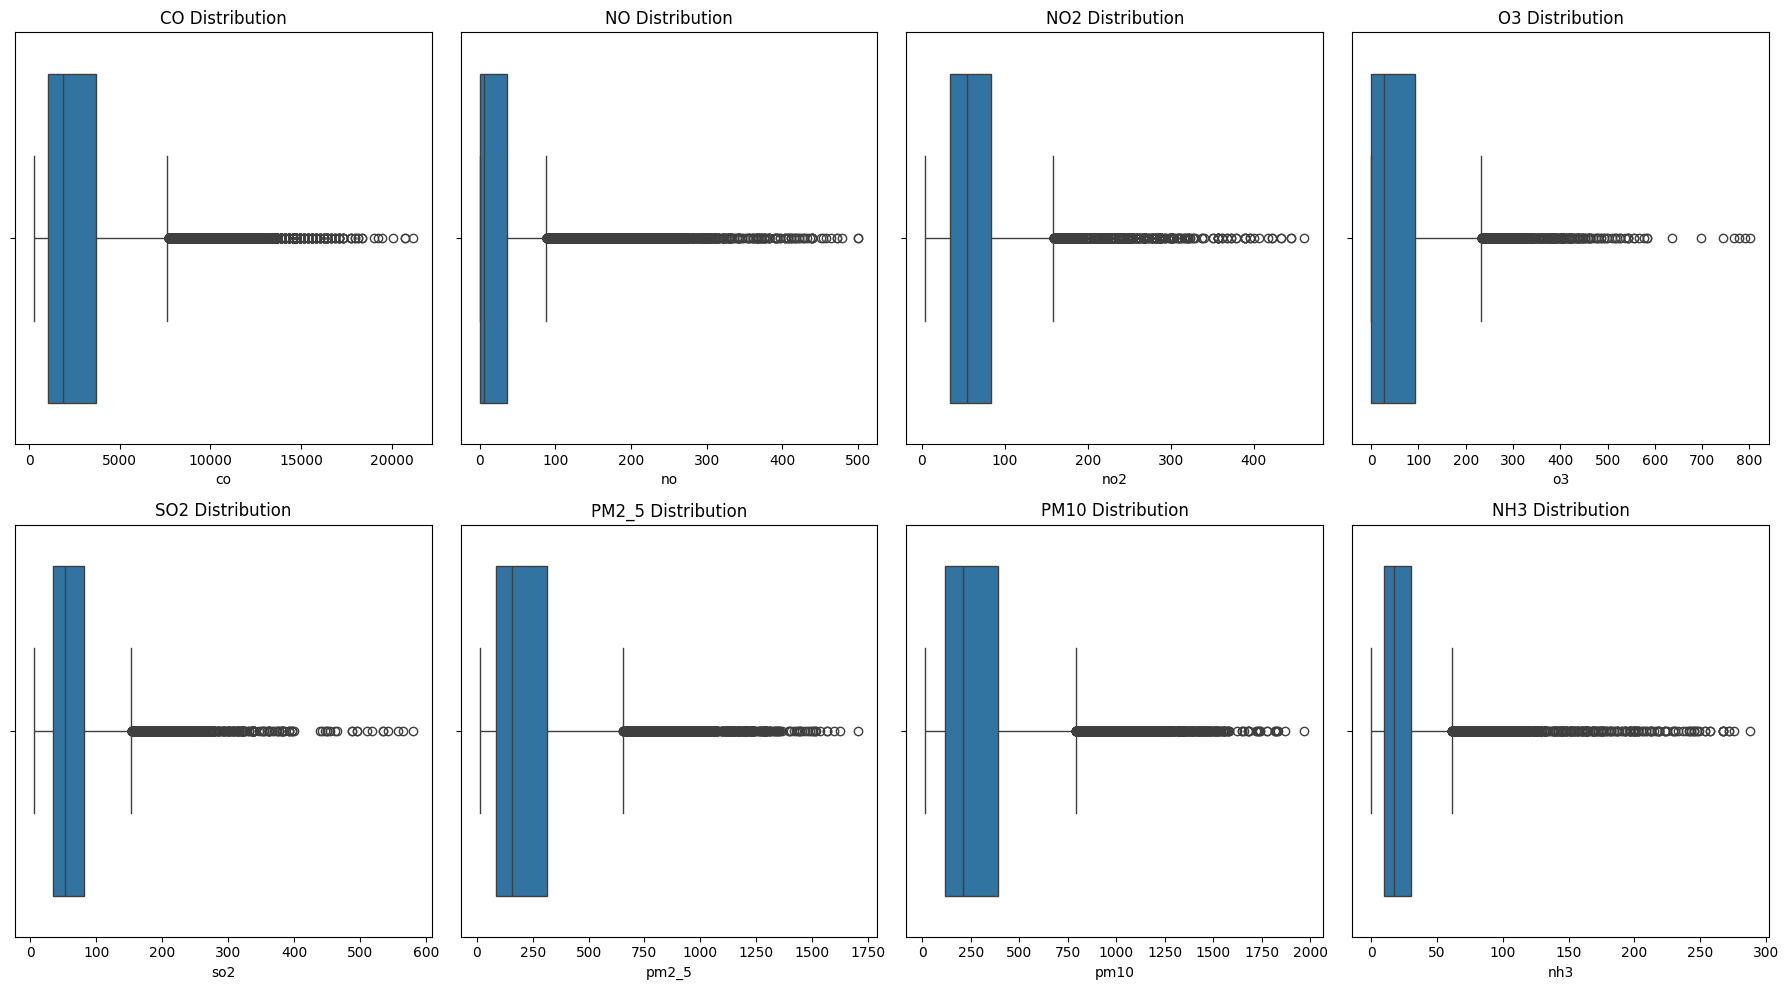

In [11]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

plt.figure(figsize=(18, 10))

for i, pollutant in enumerate(pollutants, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(x=df[pollutant])
    plt.title(f'{pollutant.upper()} Distribution')

plt.tight_layout()
plt.show()

>The Carbon Monoxide (CO) distribution has a wide range with many extreme outliers, indicating occasional very high pollution events.


>Nitric Oxide (NO), Nitrogen Dioxide (NO2), and Ammonia (NH3) have relatively few outliers, suggesting more consistent levels.
>Sulfur Dioxide (SO2), PM2.5, and PM10 have moderate ranges and some outliers, indicating variability but fewer extreme values than CO.

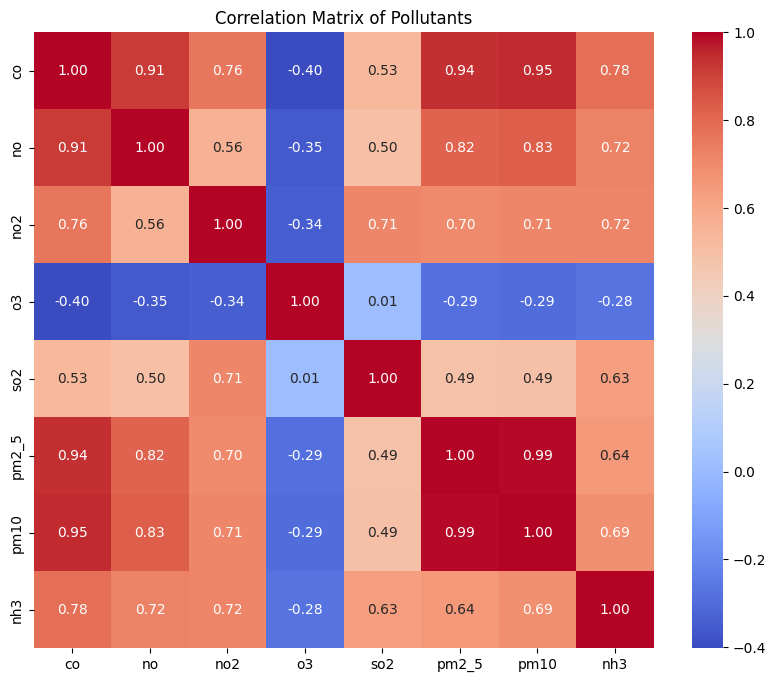

In [12]:
pollutants = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Calculate the correlation matrix for the pollutants
corr_matrix = df[pollutants].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix of Pollutants')
plt.show()

> The heatmap indicates strong positive correlations between certain pollutants like PM2.5 and PM10, suggesting common sources. CO is moderately to highly correlated with several pollutants, while O3 shows negative correlations with CO, NO, and NO2 due to photochemical reactions. SO2's correlations are weaker, implying different sources or behaviors. This information is crucial for understanding pollution patterns and guiding environmental policies.

In [13]:
print(df.columns)


Index(['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3', 'aqi',
       'Health'],
      dtype='object')


In [14]:
df.reset_index(inplace=True)

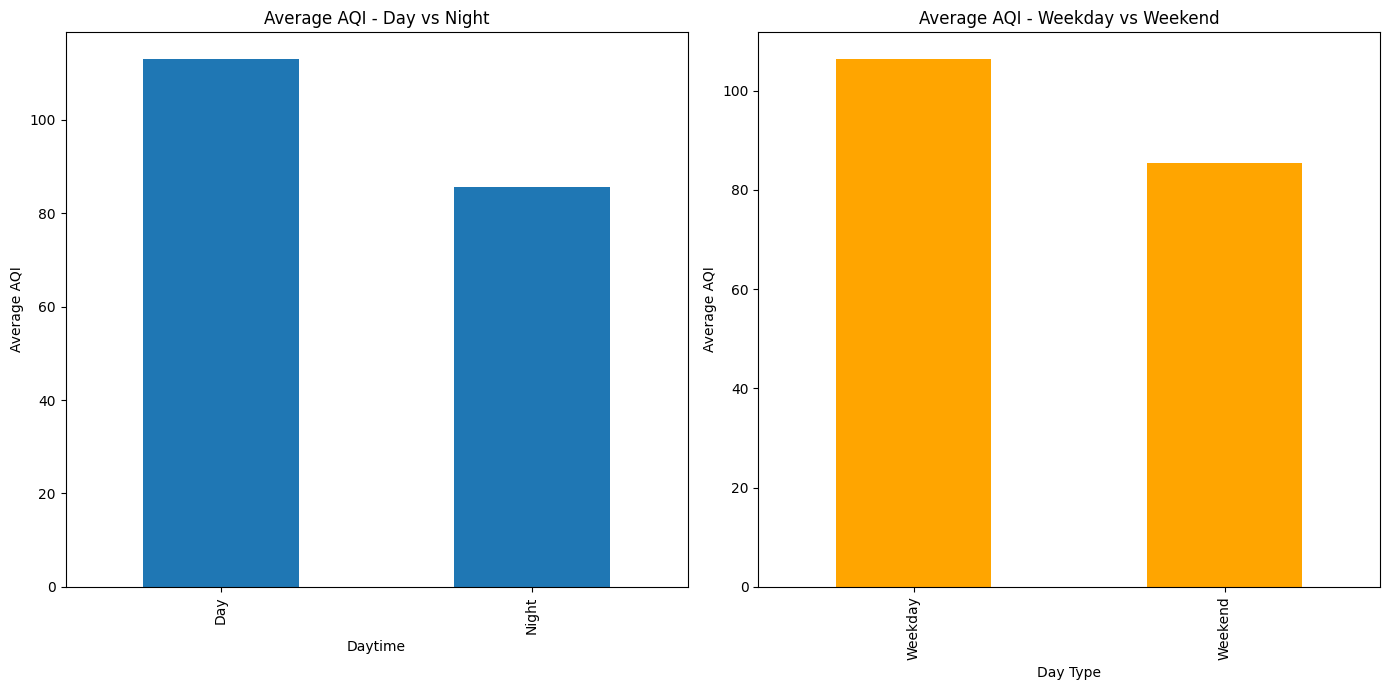

In [15]:

# # Create columns for day/night and weekday/weekend
df['daytime'] = ((df['date'].dt.hour >= 6) & (df['date'].dt.hour <= 18)).map({True: 'Day', False: 'Night'})
df['day_of_week'] = df['date'].dt.day_name()
df['weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).map({True: 'Weekend', False: 'Weekday'})

# Group by these categories and calculate means
day_night_means = df.groupby('daytime')[pollutants + ['aqi']].mean()
weekday_weekend_means = df.groupby('weekend')[pollutants + ['aqi']].mean()

plt.figure(figsize=(14, 7))

# Day/Night comparison
plt.subplot(1, 2, 1)
day_night_means['aqi'].plot(kind='bar')
plt.title('Average AQI - Day vs Night')
plt.ylabel('Average AQI')
plt.xlabel('Daytime')

# Weekday/Weekend comparison
plt.subplot(1, 2, 2)
weekday_weekend_means['aqi'].plot(kind='bar', color='orange')
plt.title('Average AQI - Weekday vs Weekend')
plt.ylabel('Average AQI')
plt.xlabel('Day Type')

plt.tight_layout()
plt.show()

>AQI is generally higher during the day compared to night, indicating more pollution during daylight hours.
>Weekday AQI is slightly higher than weekend AQI, suggesting increased pollution from weekday activities.
>There may be a need for targeted interventions during daytime and weekdays to improve air quality.

#### Splitting the dataset into training data for the model and testing data that is unseen to the model.

In [16]:
df['date'] = pd.to_datetime(df['date'])

In [17]:
df_jan2023 = df[df['date'].dt.year==2023]

In [18]:
df_jan2023.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend
18215,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,23.32,Good,Night,Sunday,Weekend
18216,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,30.64,Good,Night,Sunday,Weekend
18217,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,45.60,Good,Night,Sunday,Weekend
18218,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,54.20,Moderate,Night,Sunday,Weekend
18219,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,56.76,Moderate,Night,Sunday,Weekend


In [19]:
df_model = df.loc[df['date'].dt.year!=2023]

In [20]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy,Night,Wednesday,Weekday
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy,Night,Wednesday,Weekday
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy,Night,Wednesday,Weekday
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy,Night,Wednesday,Weekday
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy,Night,Wednesday,Weekday


In [21]:
df_visual = df_model.copy()

df_visual['year'] = df_visual['date'].dt.year
df_visual['month'] = df_visual['date'].dt.month
df_visual['day'] = df_visual['date'].dt.day
df_visual['weekday']=df_visual['date'].dt.day_name()
df_visual['time'] = df_visual['date'].dt.hour
seasons = { 1:'Winter', 2:'Winter', 3:'Summer', 4:'Summer', 5:'Summer',
           6:'Monsoon', 7:'Monsoon', 8:'Monsoon',9:'Monsoon', 10:'Autumn', 11:'Autumn',12:'Winter',}
df_visual['seasons']=df_visual['month'].map(seasons)

In [22]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy,Night,Wednesday,Weekday
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy,Night,Wednesday,Weekday
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy,Night,Wednesday,Weekday
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy,Night,Wednesday,Weekday
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy,Night,Wednesday,Weekday


In [23]:
df_visual = df_visual.set_index('date')
df_visual.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend,year,month,day,weekday,time,seasons
date,,,,,,,,,,,,,,,,,,,
2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy,Night,Wednesday,Weekday,2020,11,25,Wednesday,1,Autumn
2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy,Night,Wednesday,Weekday,2020,11,25,Wednesday,2,Autumn
2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy,Night,Wednesday,Weekday,2020,11,25,Wednesday,3,Autumn
2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy,Night,Wednesday,Weekday,2020,11,25,Wednesday,4,Autumn
2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy,Night,Wednesday,Weekday,2020,11,25,Wednesday,5,Autumn


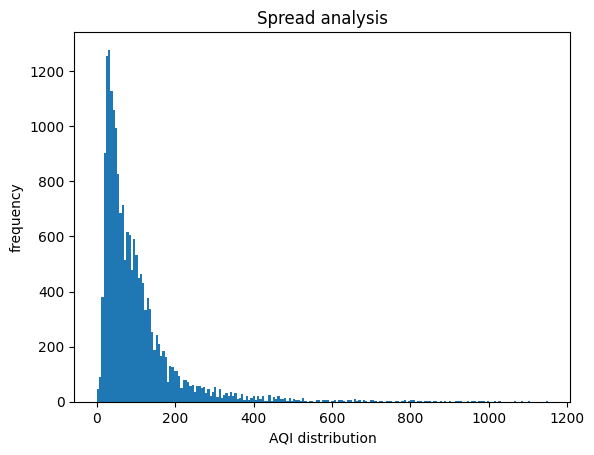

In [24]:
plt.hist(df['aqi'], bins = 200)
plt.xlabel('AQI distribution')
plt.ylabel('frequency')
plt.title('Spread analysis')
plt.show()

>The histogram shows that AQI values are skewed towards the lower end, with a high frequency of lower AQI values and fewer occurrences of higher AQI values.

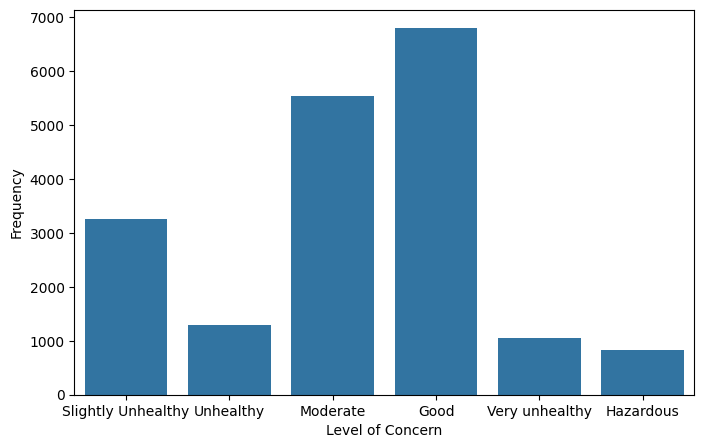

In [25]:
plt.figure(figsize=[8,5])
sns.countplot(data=df_visual, x=df['Health'])
plt.xlabel("Level of Concern")
plt.ylabel("Frequency")
plt.show()

> The bar chart illustrates the frequency of different AQI categories based on health concerns. It appears that 'Good' AQI levels are the most frequent, followed by 'Moderate', 'Unhealthy', 'Slightly Unhealthy', 'Very Unhealthy', and a smaller number of 'Hazardous' days.

>Despite the prevalence of 'Good' AQI levels, there is a significant number of days with 'Unhealthy' and 'Slightly Unhealthy' air quality, which could have implications for public health, especially for sensitive groups.

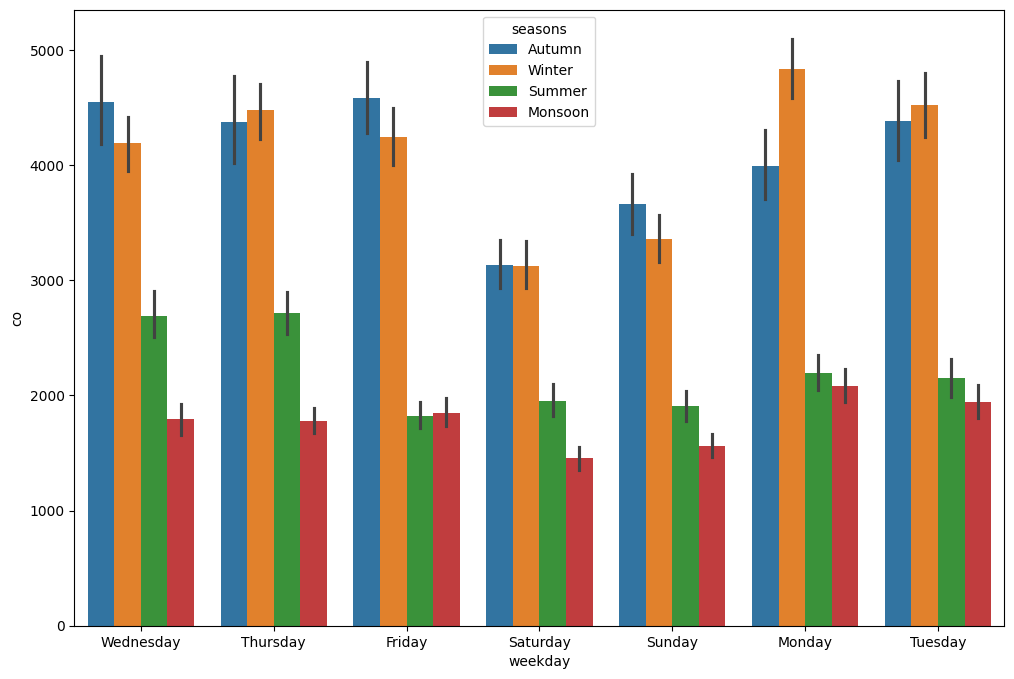

In [26]:
fig, ax= plt.subplots(figsize=(12,8))
sns.barplot(data=df_visual,x='weekday',y='co',hue='seasons',ax=ax,linewidth=1)
plt.show()

>Looking at the bar chart of carbon monoxide (CO) levels by day of the week and season, I can see that CO concentrations fluctuate with seasonal changes, possibly peaking during colder months like Autumn and Winter.

>Summer and Monsoon have similar concentrations of CO during the weekdays and the weekends.

>As compared to other seasons, Monsoons are rightly the least polluted ones which makes sense because a lot of pollution matter are washed away from the atmosphere, flowing away the rain into the ground.

### Time Series Analysis and Forecasting:

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

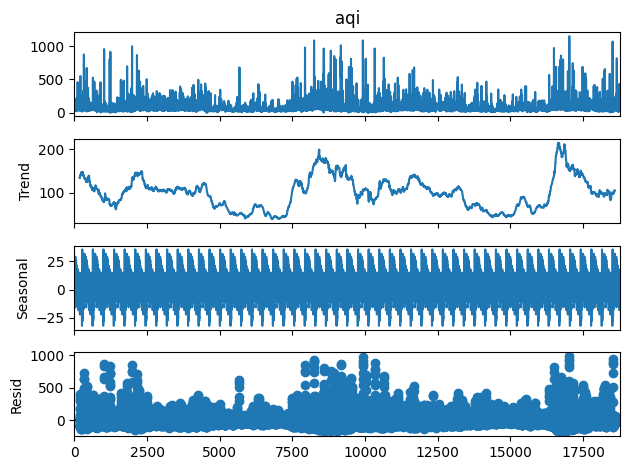

In [28]:
# Decompose the time series data
decomposition = seasonal_decompose(df['aqi'], model='additive', period=365)

# Plot the decomposed time series components
decomposition.plot()
plt.show()

# For this example, we will use SARIMA model for forecasting
# The order of (p, d, q) and seasonal_order (P, D, Q, S) should be determined after analysis, here we assume (1, 1, 1) and (1, 1, 1, 12)
model = SARIMAX(df['aqi'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast the next 12 months and plot the results
forecast = results.get_forecast(steps=12)
mean_forecast = forecast.predicted_mean
conf_int = forecast.conf_int()


>Looking at the decomposition of the AQI time series, I can see a clear trend suggesting that air quality fluctuates over time, possibly due to seasonal changes or other long-term factors. The regular pattern in the seasonal component isn't surprising—it likely reflects how weather and human activities change with the seasons, affecting air quality.

>The residuals show some interesting patterns too; they're not just random noise, which makes me think there might be other factors at play or perhaps some anomalies in the data that weren't accounted for by the trend or seasonality. If I could see the forecast, I'd be interested in how these patterns are expected to continue into the future and how confident we can be about those predictions.

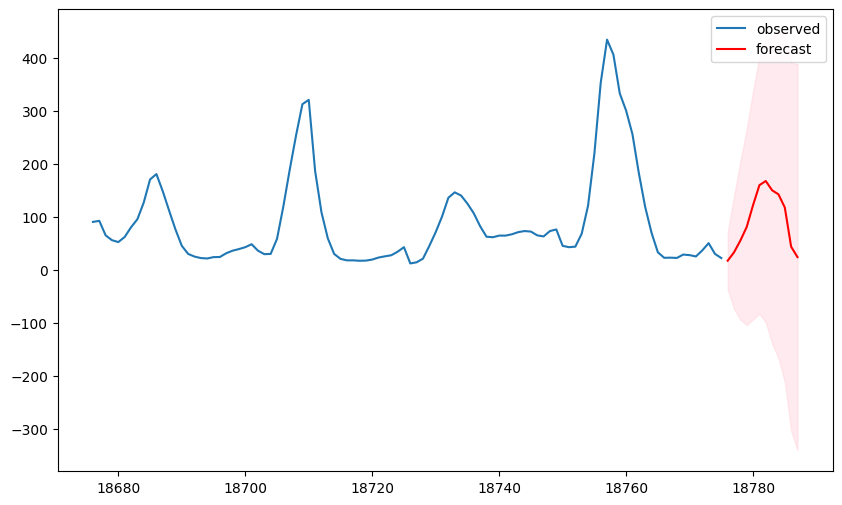

In [29]:
# Plotting the forecast and the confidence interval
plt.figure(figsize=(10, 6))
plt.plot(df.index[-100:], df['aqi'].tail(100), label='observed')
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')
plt.fill_between(conf_int.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.show()

### Train and Test Data

In [30]:
df_train = df_model
df_test = df_jan2023

In [31]:
print(df_test)

                     date       co     no    no2     o3     so2   pm2_5  \
18215 2023-01-01 00:00:00  1655.58   1.66  39.41   5.90   17.88  169.29   
18216 2023-01-01 01:00:00  1869.20   6.82  42.16   1.99   22.17  182.84   
18217 2023-01-01 02:00:00  2510.07  27.72  43.87   0.02   30.04  220.25   
18218 2023-01-01 03:00:00  3150.94  55.43  44.55   0.85   35.76  252.90   
18219 2023-01-01 04:00:00  3471.37  68.84  45.24   5.45   39.10  266.36   
...                   ...      ...    ...    ...    ...     ...     ...   
18771 2023-01-24 04:00:00  1762.39   4.64  37.01  33.26   30.52  231.15   
18772 2023-01-24 05:00:00  1735.69   6.82  34.96  46.49   34.33  225.08   
18773 2023-01-24 06:00:00  1922.61   8.16  40.10  56.51   43.39  242.49   
18774 2023-01-24 07:00:00  1361.85   9.05  52.78  71.53  100.14  165.67   
18775 2023-01-24 08:00:00  1134.87   8.61  56.89  80.11  110.63  123.76   

         pm10    nh3    aqi    Health daytime day_of_week  weekend  
18215  194.64   5.83  23.32   

In [32]:
df_model.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63,114.52,Slightly Unhealthy,Night,Wednesday,Weekday
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04,164.16,Unhealthy,Night,Wednesday,Weekday
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14,196.56,Unhealthy,Night,Wednesday,Weekday
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13,192.52,Unhealthy,Night,Wednesday,Weekday
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61,186.44,Unhealthy,Night,Wednesday,Weekday


In [33]:
df_train = df_train.drop(['date','Health','daytime','day_of_week','weekend'],axis=1)

In [34]:
df_test = df_test.drop(['date','Health'],axis=1)

In [35]:
X = df_train.iloc[:, :-1]
y = df_train.iloc[:, -1]

In [36]:
X.head()

,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [37]:
y.head()

0    114.52
1    164.16
2    196.56
3    192.52
4    186.44
Name: aqi, dtype: float64

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=127)

In [39]:
print(f"Shape of X_Train: {X_train.shape}\nShape of y_Train: {y_train.shape}\nShape of X_Test: {X_test.shape}\nShape of y_test: {y_test.shape}")

Shape of X_Train: (14572, 8)
Shape of y_Train: (14572,)
Shape of X_Test: (3643, 8)
Shape of y_test: (3643,)


In [40]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
# Model Tuning
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

# Data Preprocessing
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning

import xgboost
#from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt


In [41]:
models = [
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("KNN", KNeighborsRegressor()),
    ("CART", DecisionTreeRegressor()),
    ("RF", RandomForestRegressor(n_estimators=100, random_state=42)),
    ("SVR", SVR()),
    ("GBM", GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ("XGBoost", XGBRegressor(objective='reg:squarederror')),
]

results = {}
for name, model in models:
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results[name] = rmse

for model_name, rmse_score in results.items():
    print(f"{model_name} RMSE: {rmse_score:.4f}")

Ridge RMSE: 0.0000
Lasso RMSE: 0.0614
ElasticNet RMSE: 0.1807
KNN RMSE: 37.4841
CART RMSE: 0.4841
RF RMSE: 0.3306
SVR RMSE: 65.3974
GBM RMSE: 1.0349
XGBoost RMSE: 7.0833


### Time Series Models

> Prophet is a time series forecasting tool developed by Facebook that is designed to handle the various common patterns in time series data efficiently, such as seasonality and holidays.

DEBUG:cmdstanpy:input tempfile: /tmp/tmpokntra4m/kvhi7xlx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpokntra4m/oae4me2c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12654', 'data', 'file=/tmp/tmpokntra4m/kvhi7xlx.json', 'init=/tmp/tmpokntra4m/oae4me2c.json', 'output', 'file=/tmp/tmpokntra4m/prophet_model3ej9vlty/prophet_model-20240211034840.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:48:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:48:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


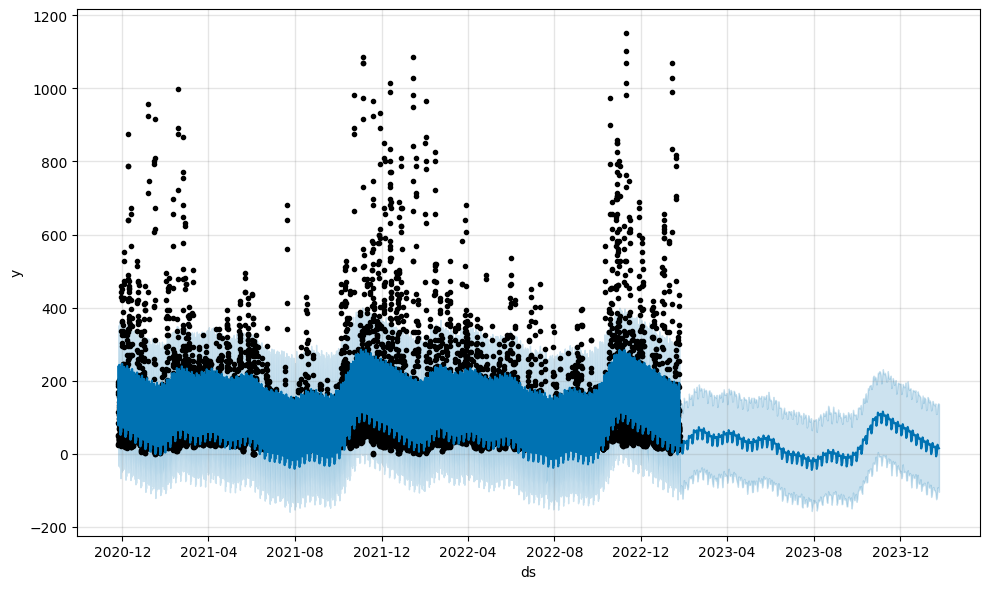

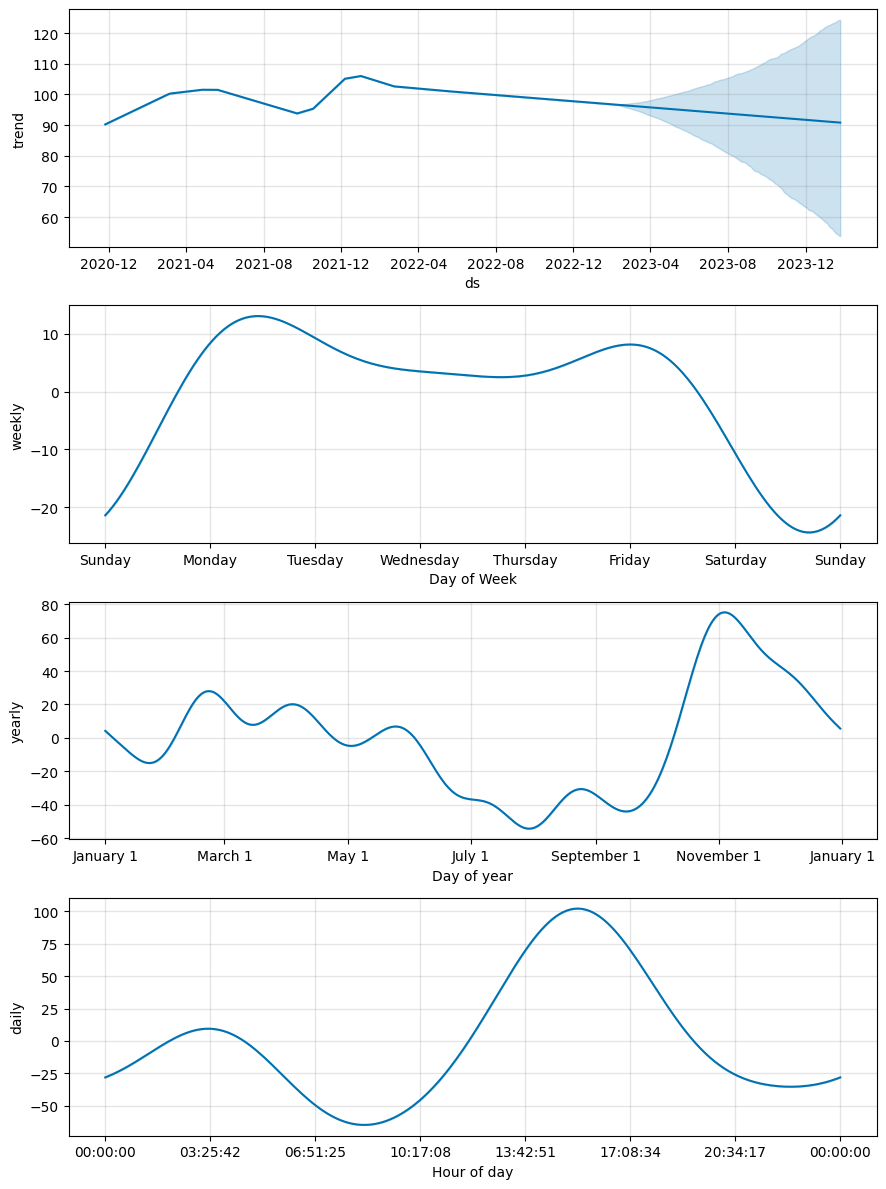

In [42]:
from prophet import Prophet

# Prepare the data
df_prophet = df[['date', 'aqi']].rename(columns={'date': 'ds', 'aqi': 'y'})

# Instantiate and fit the model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Create a future dataframe
future = model_prophet.make_future_dataframe(periods=365)

# Predict and plot
forecast = model_prophet.predict(future)
fig = model_prophet.plot(forecast)
components_fig = model_prophet.plot_components(forecast)


In [48]:
from sklearn.ensemble import IsolationForest

# Assuming df['aqi'] contains the AQI values
isolation_forest = IsolationForest(n_estimators=100)
anomalies = isolation_forest.fit_predict(df[['aqi']])

# Add the anomalies to the dataframe
df['anomaly'] = anomalies
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})  # Convert to 0 for normal, 1 for anomaly


**Cluster Analysis**

In [51]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['co', 'no2', 'pm2_5', 'so2', 'pm10', 'nh3']
df_numeric = df[numeric_cols]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_numeric)




In [52]:
from sklearn.cluster import KMeans

kmeans = KMeans()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

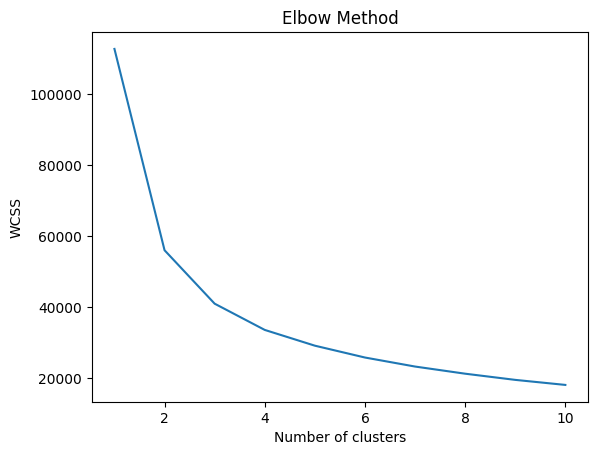

In [53]:
# Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [55]:
# Choose an appropriate number of clusters based on Step 4
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add cluster information to the DataFrame
df['Cluster'] = clusters

# Analyze the characteristics of each cluster
for i in range(3):
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} characteristics:")
    print(cluster_data.describe())


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 characteristics:
                 co           no          no2           o3          so2  \
count   4774.000000  4774.000000  4774.000000  4774.000000  4774.000000   
mean    4889.302547    64.343404    99.736959    30.120006    87.195350   
std     1856.651833    55.076791    35.762091    73.230580    47.592016   
min     1148.220000     0.000000    20.220000     0.000000    20.500000   
25%     3524.780000    19.000000    74.030000     0.000000    56.270000   
50%     4646.300000    51.410000    95.960000     0.400000    76.290000   
75%     6141.660000    96.560000   119.270000    21.820000   103.000000   
max    11535.650000   311.140000   260.470000   801.090000   534.060000   

             pm2_5         pm10          nh3          aqi      anomaly  \
count  4774.000000  4774.000000  4774.000000  4774.000000  4774.000000   
mean    397.027602   491.455735    34.206508   136.826033     0.307708   
std     157.132690   175.878448    17.969971    71.879886     0.461594   
m

Overall, these clusters indicate different pollution profiles in Delhi. Cluster 0 might represent regular urban pollution possibly influenced by traffic and industrial activities. Cluster 1 seems to capture days with comparatively better air quality, possibly due to favorable weather conditions or effective pollution control measures. Cluster 2 likely includes days with severe pollution events, which could be due to specific incidents like festivals (increased firecracker use), crop burning, or other episodic events leading to very poor air quality.


**Feature Importance Analysis**

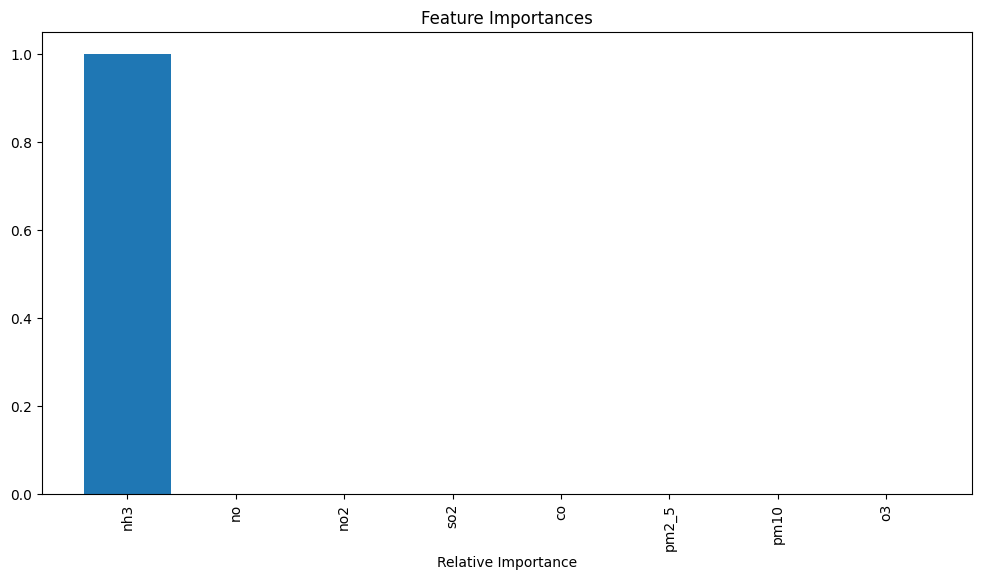

In [60]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

features = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), [features[i] for i in indices], rotation=90)
plt.xlabel('Relative Importance')
plt.show()




Why do we end up deleting the most corelated and the most important feature, that is NH3 from the modeling of the dataset ?

One of the reasons is that we want to figure out how the other features are contributing to the prediction of AQI values in absence of NH3 which has a high corelation and if we fit the model while keeping that in the dataset, then that might lead to overfitting the data and also the undervaluing the contribution behind other factors as explained by the Feature Importance (where NH3 takes up the score of 0.9, that leaves other features with negligible influence).

Secondly the most important factor is something that the authorities can anyway try to deal with on their own. In this case, it's NH3 which is something that the governement is dedicated to work upon. Therefore, running the model on other features might not be a good idea behind the prediction, if we are trying to aim for Accuracy, however, that might be a good step to undertake if we have to analyse the feedback of other features in this dataset, hence giving a well sorted palette for the govt to take necessary actions for reduxing the accordingly important pollutants



**Sensitivity Analysis**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does

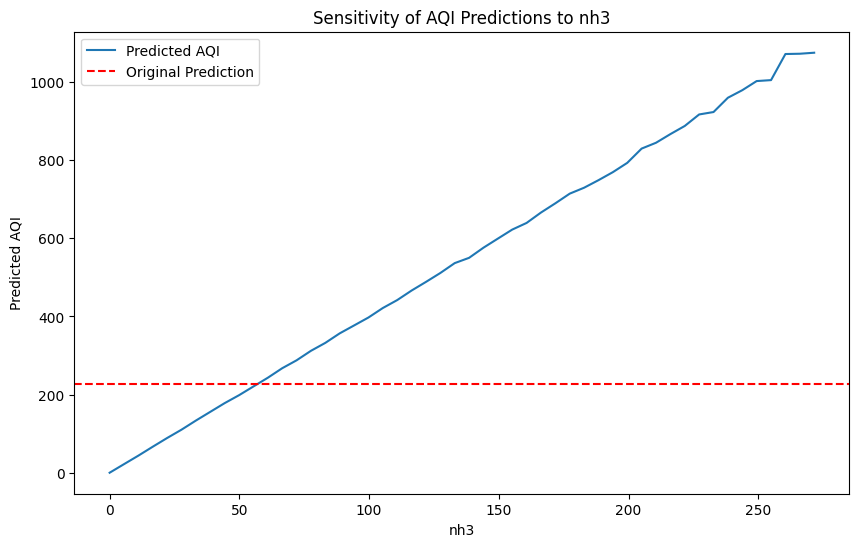

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

trained_model = RandomForestRegressor()
trained_model.fit(X_train, y_train)

baseline = X_test.iloc[0].copy()


original_prediction = trained_model.predict(baseline.values.reshape(1, -1))

feature = 'nh3'

feature_range = np.linspace(start=np.min(X_test[feature]),
                            stop=np.max(X_test[feature]),
                            num=50)

predictions = []

for value in feature_range:
    baseline[feature] = value

    prediction = trained_model.predict(baseline.values.reshape(1, -1))
    predictions.append(prediction)

plt.figure(figsize=(10, 6))
plt.plot(feature_range, predictions, label='Predicted AQI')
plt.axhline(y=original_prediction, color='r', linestyle='--', label='Original Prediction')
plt.title(f'Sensitivity of AQI Predictions to {feature}')
plt.xlabel(feature)
plt.ylabel('Predicted AQI')
plt.legend()
plt.show()


In [66]:
new_df_train = df_train.drop('nh3',axis=1)

In [67]:
new_df_train.head()

,co,no,no2,o3,so2,pm2_5,pm10,aqi
0,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,114.52
1,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,164.16
2,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,196.56
3,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,192.52
4,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,186.44


In [69]:
new_X = new_df_train.drop('aqi', axis=1)
new_y = new_df_train['aqi']

In [70]:
new_X_train, new_X_test, new_y_train, new_y_test = train_test_split(new_X, new_y, test_size=0.2, random_state=127)

In [72]:
models = [("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          ('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          ('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror'))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, new_X, new_y, cv=5, scoring="neg_mean_squared_error", error_score='raise')))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")

RMSE: 52.8541 (Ridge) 
RMSE: 52.8497 (Lasso) 
RMSE: 52.8495 (ElasticNet) 
RMSE: 46.3761 (KNN) 
RMSE: 47.2031 (CART) 
RMSE: 34.351 (RF) 
RMSE: 67.5771 (SVR) 
RMSE: 36.322 (GBM) 
RMSE: 34.7059 (XGBoost) 


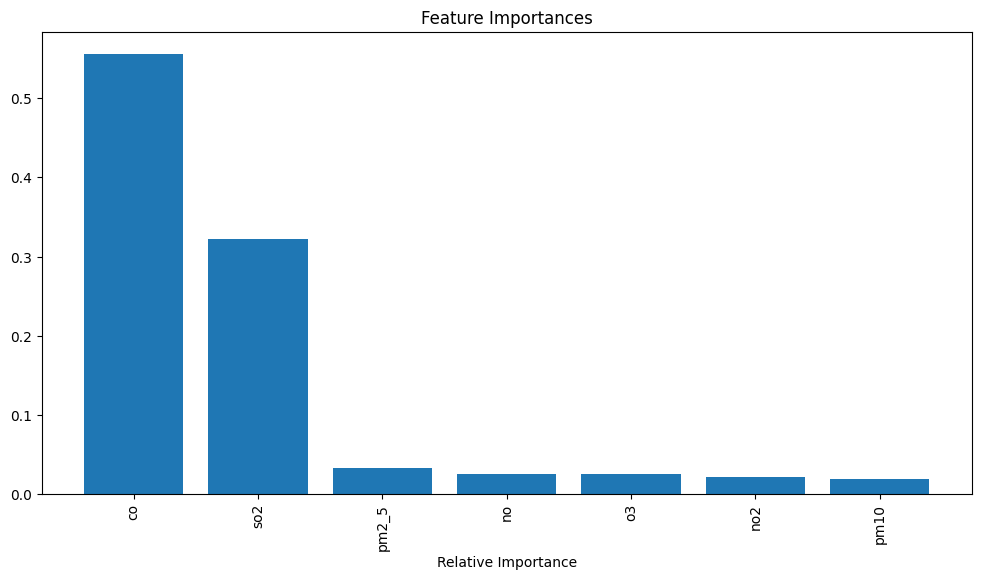

In [74]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np

features_without_nh3 = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10']
rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(new_X_train, new_y_train)

importances = rf.feature_importances_

# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(new_X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(new_X_train.shape[1]), [features_without_nh3[i] for i in indices], rotation=90)
plt.xlabel('Relative Importance')
plt.show()

In [80]:
y_true = np.array(new_y_test)
y_predicted = np.array(new_y_pred)

In [81]:
df1 = pd.DataFrame({'y_true': y_true, 'y_pred': y_predicted})
df1.head()

,y_true,y_pred
0,13.44,52.2152
1,25.60,23.1100
2,47.12,43.6736
3,20.76,43.9552
4,31.16,27.4296


In [82]:
df2 = pd.DataFrame({'A': y_true, 'B': y_predicted})

In [83]:
df2['difference'] = df2['B'] - df2['A']
print(df2)

           A         B  difference
0      13.44   52.2152     38.7752
1      25.60   23.1100     -2.4900
2      47.12   43.6736     -3.4464
3      20.76   43.9552     23.1952
4      31.16   27.4296     -3.7304
...      ...       ...         ...
3638   62.84   94.4712     31.6312
3639   85.12   70.9628    -14.1572
3640  156.04  134.8560    -21.1840
3641  239.12  249.0848      9.9648
3642  689.04  617.1572    -71.8828

[3643 rows x 3 columns]


In [84]:
count = 0
diff = df2['B'] - df2['A']
for i in diff :
  if i > 16 :
    # print('Incorrect')
    pass
  else :
    # print('Correct')
    count += 1

rows = len(new_y_test)

print("There were", count, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 16.")
print('Accuracy Percentage : ', count/rows * 100)

There were 2929 number of labels correctly predicted in the test dataset out of 3643 instances, with an error scope of 16.
Accuracy Percentage :  80.4007685973099


**RandomForestRegressor model excluding NH3**

In [85]:
model.fit(new_X_train,new_y_train)
new_y_pred = model.predict(new_X_test)
y_test = np.array(new_y_test)
y_pred = np.array(new_y_pred)
df1 = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred})

In [86]:
df_2 = pd.DataFrame({'A': y_test, 'B': y_pred})

df_2['difference'] = df_2['B'] - df_2['A']
print(df2)

           A         B  difference
0      13.44   52.2152     38.7752
1      25.60   23.1100     -2.4900
2      47.12   43.6736     -3.4464
3      20.76   43.9552     23.1952
4      31.16   27.4296     -3.7304
...      ...       ...         ...
3638   62.84   94.4712     31.6312
3639   85.12   70.9628    -14.1572
3640  156.04  134.8560    -21.1840
3641  239.12  249.0848      9.9648
3642  689.04  617.1572    -71.8828

[3643 rows x 3 columns]


In [87]:
count = 0
diff = df_2['B'] - df_2['A']
for i in diff :
  if i > 16 :
    # print('Incorrect')
    pass
  else :
    # print('Correct')
    count += 1

rows = len(new_y_test)

print("There were", count, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 16.")
print('Accuracy Percentage : ', count/rows * 100)

There were 2911 number of labels correctly predicted in the test dataset out of 3643 instances, with an error scope of 16.
Accuracy Percentage :  79.90667032665387


In [88]:
#Selecting Jan 2023 data from dataset
df_jan2023 = df[df['date'].dt.year==2023]
df_jan2023.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Health,daytime,day_of_week,weekend,anomaly,Cluster
18215,2023-01-01 00:00:00,1655.58,1.66,39.41,5.90,17.88,169.29,194.64,5.83,23.32,Good,Night,Sunday,Weekend,0,1
18216,2023-01-01 01:00:00,1869.20,6.82,42.16,1.99,22.17,182.84,211.08,7.66,30.64,Good,Night,Sunday,Weekend,0,1
18217,2023-01-01 02:00:00,2510.07,27.72,43.87,0.02,30.04,220.25,260.68,11.40,45.60,Good,Night,Sunday,Weekend,0,1
18218,2023-01-01 03:00:00,3150.94,55.43,44.55,0.85,35.76,252.90,304.12,13.55,54.20,Moderate,Night,Sunday,Weekend,0,1
18219,2023-01-01 04:00:00,3471.37,68.84,45.24,5.45,39.10,266.36,322.80,14.19,56.76,Moderate,Night,Sunday,Weekend,0,1


In [90]:
#assigning Jan 2023 data to df_test and dropping date and health columns
df_test = df_jan2023
df_test = df_test.drop(['date','Health'],axis=1)

In [98]:
#jan_X = df_test.drop(['nh3','aqi'],axis=1)
jan_X = df_test.drop(['nh3','aqi','daytime','day_of_week', 'weekend','anomaly','Cluster'],axis=1)
jan_y = df_jan2023['aqi']

In [99]:
jan_X.head()

,co,no,no2,o3,so2,pm2_5,pm10
18215,1655.58,1.66,39.41,5.90,17.88,169.29,194.64
18216,1869.20,6.82,42.16,1.99,22.17,182.84,211.08
18217,2510.07,27.72,43.87,0.02,30.04,220.25,260.68
18218,3150.94,55.43,44.55,0.85,35.76,252.90,304.12
18219,3471.37,68.84,45.24,5.45,39.10,266.36,322.80


In [100]:
jan_y.head()

18215    23.32
18216    30.64
18217    45.60
18218    54.20
18219    56.76
Name: aqi, dtype: float64

In [101]:
jan_y_pred = new_model.predict(jan_X)

In [102]:
#converting Jan_y series to numpy array
jan_y_up = np.array(jan_y)

In [104]:
flag = 0
for i in range(0,561) :

  if abs(jan_y_pred[i] - jan_y_up[i]) <= 36 :
    flag += 1

print(flag, len(jan_y))
rows = len(jan_y)

472 561


In [105]:
print("There were", flag, "number of labels correctly predicted in the test dataset out of", rows, "instances, with an error scope of 36.")
print('Accuracy Percentage for : ', flag/rows * 100)

There were 472 number of labels correctly predicted in the test dataset out of 561 instances, with an error scope of 36.
Accuracy Percentage for :  84.13547237076648


**Reflection**

Air quality in Delhi fluctuates seasonally, with winter and autumn typically experiencing severe pollution levels, while monsoon and summer see moderately poor conditions. During summers, fine particulate matter (PM2.5) levels often reach severe levels, while nitrogen dioxide (NO2) and ozone (O3) are generally at satisfactory levels, and ammonia (NH3) is good. The air is fresher in the mornings but deteriorates as the day progresses, especially on weekdays, likely due to increased traffic and industrial activity.

The persistent air pollution crisis in Delhi poses significant risks to public health, including respiratory and cardiovascular diseases, and it adversely affects the environment and the overall quality of life for its residents. Various factors contribute to the city's poor air quality, such as emissions from vehicles and industries, construction dust, and crop burning in nearby regions.

The government has taken steps to curb pollution, like implementing traffic restrictions, closing power plants, and setting up air quality monitors. However, these efforts need to be sustained and enhanced. Individuals also play a critical role in combating air pollution. Choices like using public transport, reducing vehicle usage, and cutting down on single-use plastics can collectively make a significant impact.

Looking forward, it's imperative to continue and expand upon current initiatives and explore new strategies to improve Delhi's air quality. Sustained efforts from both the government and the public are essential to ensure a healthier future for Delhi's environment and its people.





